In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
ruta_archivo = "../Datos/transformed_data.csv"

df = pd.read_csv(ruta_archivo)
# Eliminar las columnas "Height" y "Weight"
df = df.drop(["Height", "Weight"], axis=1)
df

,onehot__Gender_Female,onehot__Gender_Male,onehot__family_history_with_overweight_no,onehot__family_history_with_overweight_yes,onehot__FAVC_no,onehot__FAVC_yes,onehot__CAEC_Always,onehot__CAEC_Frequently,onehot__CAEC_Sometimes,onehot__CAEC_no,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,no,0.0,1.0,no,Normal_Weight,0,0,0,1,0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,yes,3.0,0.0,Sometimes,Normal_Weight,0,0,0,1,0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,no,2.0,1.0,Frequently,Normal_Weight,0,0,0,1,0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,no,2.0,0.0,Frequently,Overweight_Level_I,0,0,0,0,1
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,no,0.0,0.0,Sometimes,Overweight_Level_II,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,no,2.0,1.0,Sometimes,Obesity_Type_III,0,0,0,1,0
2107,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,no,1.0,1.0,Sometimes,Obesity_Type_III,0,0,0,1,0
2108,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,no,1.0,1.0,Sometimes,Obesity_Type_III,0,0,0,1,0
2109,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,no,1.0,1.0,Sometimes,Obesity_Type_III,0,0,0,1,0


In [3]:
# Definir la variable objetivo (y)
y = df["NObeyesdad"]

# Definir características (X) excluyendo la variable objetivo
X = df.drop("NObeyesdad", axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Imprimir la forma de los conjuntos de entrenamiento y prueba para verificar
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (1688, 50)
Forma de X_test: (423, 50)
Forma de y_train: (1688,)
Forma de y_test: (423,)


In [4]:
# Definir el mapeo de categorías a códigos
mapeo_codigos = {
    'Insufficient_Weight': 1,
    'Normal_Weight': 2,
    'Overweight_Level_I': 3,
    'Overweight_Level_II': 4,
    'Obesity_Type_I': 5,
    'Obesity_Type_II': 6,
    'Obesity_Type_III': 7
}

# Reemplazar las categorías con los códigos correspondientes
y_test = y_test.replace(mapeo_codigos)
y_train = y_train.replace(mapeo_codigos)

C:\Users\sonya\AppData\Local\Temp\ipykernel_88324\265551118.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace(mapeo_codigos)
C:\Users\sonya\AppData\Local\Temp\ipykernel_88324\265551118.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace(mapeo_codigos)


In [5]:
# Convertir y_train en un DataFrame
y_train = pd.DataFrame(y_train, columns=['NObeyesdad'])
# Convertir y_train en un DataFrame
y_test = pd.DataFrame(y_test, columns=['NObeyesdad'])

In [6]:
# Lista de nombres de columnas problemáticas
columnas_problema = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC','remainder__Age','remainder__Height','remainder__Weight','remainder__FCVC','remainder__NCP',
                     'remainder__CH2O','remainder__FAF','remainder__TUE','remainder__NObeyesdad','remainder__MTRANS_Automobile','remainder__MTRANS_Bike','remainder__MTRANS_Motorbike',
                     'remainder__MTRANS_Public_Transportation','remainder__MTRANS_Walking']

# Eliminar las columnas problemáticas del DataFrame
X_train = X_train.drop(columnas_problema, axis=1)

In [7]:
# Lista de nombres de columnas problemáticas
columnas_problema = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC','remainder__Age','remainder__Height','remainder__Weight','remainder__FCVC','remainder__NCP',
                     'remainder__CH2O','remainder__FAF','remainder__TUE','remainder__NObeyesdad','remainder__MTRANS_Automobile','remainder__MTRANS_Bike','remainder__MTRANS_Motorbike',
                     'remainder__MTRANS_Public_Transportation','remainder__MTRANS_Walking']

# Eliminar las columnas problemáticas del DataFrame
X_test = X_test.drop(columnas_problema, axis=1)

In [8]:
frecuencias = y_test.value_counts()

# Imprime las frecuencias de los valores únicos
print(frecuencias)

NObeyesdad
5             71
7             71
1             64
2             58
6             56
4             55
3             48
Name: count, dtype: int64


<!-- En el siguiente bloque de código, se llevará a cabo la optimización de hiperparámetros para un modelo de regresión logística multinomial utilizando la técnica de búsqueda en rejilla (GridSearchCV). La regresión logística multinomial es un algoritmo de aprendizaje supervisado utilizado para la clasificación de múltiples clases. Este proceso de optimización implica encontrar la combinación más adecuada de hiperparámetros del modelo, como el parámetro de regularización C, que maximice la precisión del modelo en los datos de entrenamiento. 

Para ello, se define un espacio de búsqueda de hiperparámetros con diferentes valores de C y se utiliza la validación cruzada con 5 folds para evaluar el rendimiento del modelo con cada combinación de hiperparámetros. Una vez completada la búsqueda, se identifica el mejor modelo encontrado y se evalúa su desempeño en los datos de prueba.

Finalmente, se genera un reporte de clasificación que proporciona métricas como precisión, recall, f1-score y support para cada clase del modelo. Además, se crea una matriz de confusión para visualizar de manera intuitiva cómo el modelo ha clasificado las instancias en cada clase, tanto en términos absolutos como en porcentaje, lo que facilita la interpretación de su rendimiento y posibles áreas de mejora. -->


<!-- En el siguiente bloque de código, se llevará a cabo la optimización de hiperparámetros para un modelo de regresión logística multinomial utilizando la técnica de búsqueda en rejilla (GridSearchCV). La regresión logística multinomial es un algoritmo de aprendizaje supervisado utilizado para la clasificación de múltiples clases. Este proceso de optimización implica encontrar la combinación más adecuada de hiperparámetros del modelo, como el parámetro de regularización C, que maximice la precisión del modelo en los datos de entrenamiento. 

Para ello, se define un espacio de búsqueda de hiperparámetros con diferentes valores de C y se utiliza la validación cruzada con 5 folds para evaluar el rendimiento del modelo con cada combinación de hiperparámetros. Una vez completada la búsqueda, se identifica el mejor modelo encontrado y se evalúa su desempeño en los datos de prueba.

Finalmente, se genera un reporte de clasificación que proporciona métricas como precisión, recall, f1-score y support para cada clase del modelo. Además, se crea una matriz de confusión para visualizar de manera intuitiva cómo el modelo ha clasificado las instancias en cada clase, tanto en términos absolutos como en porcentaje, lo que facilita la interpretación de su rendimiento y posibles áreas de mejora. -->


En el siguiente bloque de código, se llevará a cabo la optimización de hiperparámetros para un modelo de regresión logística multinomial utilizando la técnica de búsqueda en rejilla (GridSearchCV).

La regresión logística multinomial es un algoritmo de aprendizaje supervisado utilizado para la clasificación de múltiples clases. Este proceso de optimización implica encontrar la combinación más adecuada de hiperparámetros del modelo, como el parámetro de regularización C, que maximice la precisión del modelo en los datos de entrenamiento.

Para ello, se define un espacio de búsqueda de hiperparámetros con diferentes valores de C y se utiliza la validación cruzada con 5 folds para evaluar el rendimiento del modelo con cada combinación de hiperparámetros. Una vez completada la búsqueda, se identifica el mejor modelo encontrado y se evalúa su desempeño en los datos de prueba.

Finalmente, se genera un reporte de clasificación que proporciona métricas como precisión, recall, f1-score y support para cada clase del modelo. Además, se crea una matriz de confusión para visualizar de manera intuitiva cómo el modelo ha clasificado las instancias en cada clase, tanto en términos absolutos como en porcentaje, lo que facilita la interpretación de su rendimiento y posibles áreas de mejora.

c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataC

c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataC

Mejores hiperparámetros encontrados:
{'C': 100}

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.72      0.66      0.69        64
           2       0.55      0.36      0.44        58
           3       0.33      0.29      0.31        48
           4       0.52      0.25      0.34        55
           5       0.51      0.65      0.57        71
           6       0.51      0.84      0.63        56
           7       0.93      0.99      0.96        71

    accuracy                           0.60       423
   macro avg       0.58      0.58      0.56       423
weighted avg       0.60      0.60      0.58       423



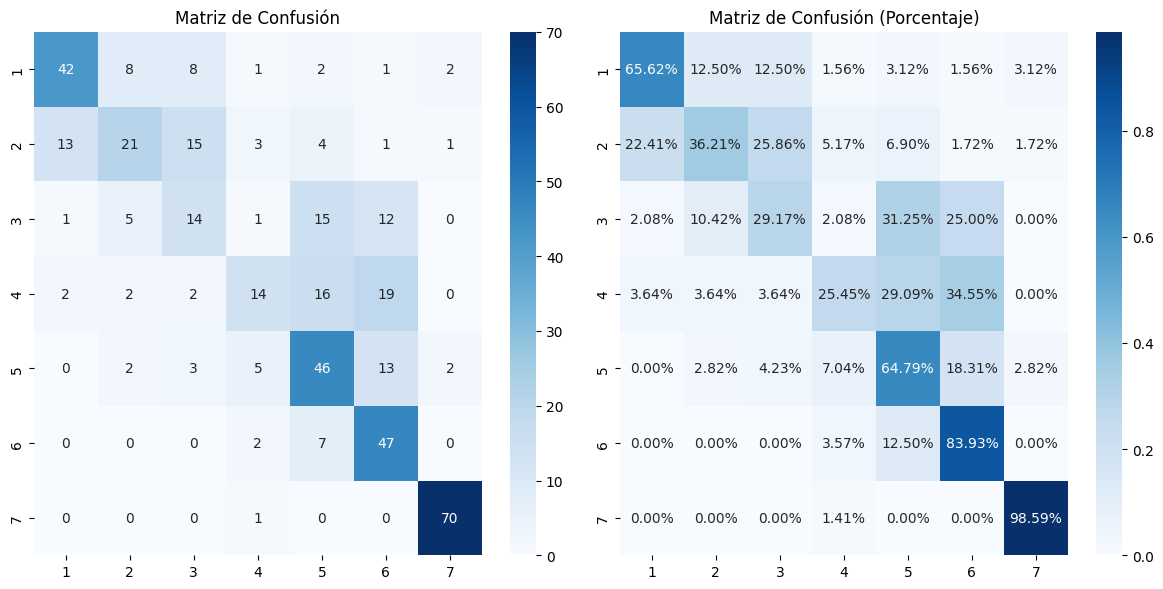

In [9]:
# Definir el modelo de regresión logística multinomial
logistic_model = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=5000, random_state=123)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Definir el proceso iterativo de búsqueda de hiperparámetros
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado por la búsqueda
best_model = grid_search.best_estimator_

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print()

# Evaluar el modelo en los datos de prueba
y_pred = best_model.predict(X_test)

# Imprimir el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Obtener las etiquetas únicas de y_test
etiquetas_unicas = np.unique(y_test)

# Calcular el total de predicciones por clase
total_por_clase_rf = conf_matrix.sum(axis=1)

# Calcular la matriz de confusión como porcentaje
conf_matrix_porcentaje_rf = conf_matrix / total_por_clase_rf[:, np.newaxis]

# Crear una figura y ejes para la grilla
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Crear el mapa de calor de la matriz de confusión sin normalizar
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=etiquetas_unicas, yticklabels=etiquetas_unicas, ax=axs[0])
axs[0].set_title('Matriz de Confusión')

# Crear el mapa de calor de la matriz de confusión en porcentajes
sns.heatmap(conf_matrix_porcentaje_rf, annot=True, cmap='Blues', fmt='.2%', xticklabels=etiquetas_unicas, yticklabels=etiquetas_unicas, ax=axs[1])
axs[1].set_title('Matriz de Confusión (Porcentaje)')

# Ajustar el diseño de la grilla
plt.tight_layout()

# Mostrar la grilla
plt.show()

In [10]:
# Calcular la precisión global (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión global (accuracy)
print("Precisión Global (Accuracy):", accuracy)

Precisión Global (Accuracy): 0.6004728132387707


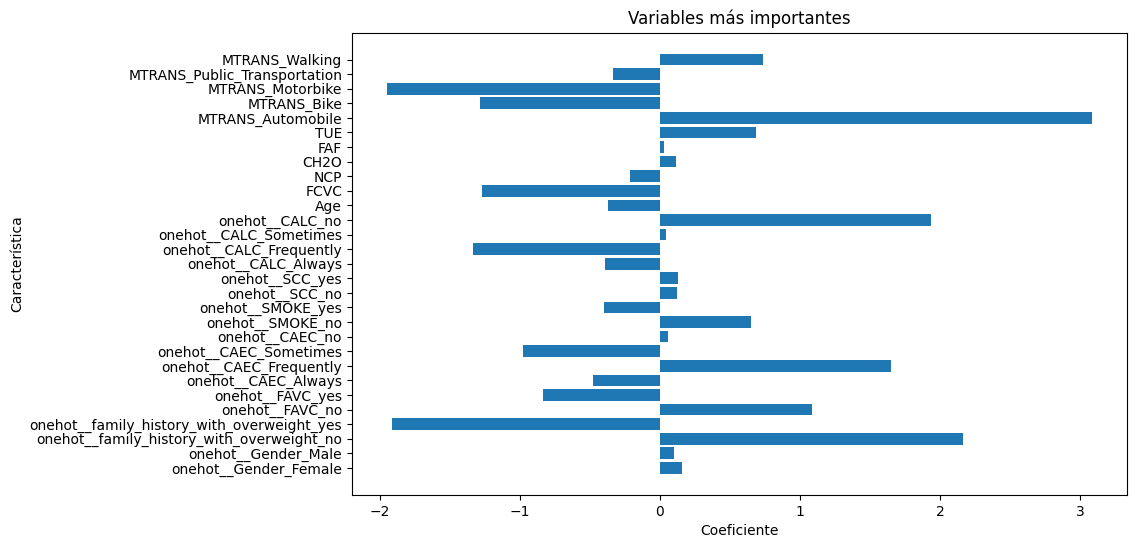

In [11]:
# Obtener los coeficientes del modelo
coeficientes = best_model.coef_

# Obtener los nombres de las características
nombres_caracteristicas = X_train.columns

# Crear un gráfico de barras para visualizar los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(nombres_caracteristicas, coeficientes[0])
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.title('Variables más importantes')
plt.show()

El siguiente bloque de código se enfoca en la implementación y evaluación de un modelo de Random Forest para la clasificación de datos. 

Inicialmente, se establece una semilla aleatoria para reproducibilidad. Luego, se preparan las características numéricas mediante un proceso de escalado utilizando `StandardScaler`. Esto se realiza como parte de un pipeline para asegurar que el preprocesamiento se aplique correctamente tanto en los datos de entrenamiento como en los datos de prueba.

Posteriormente, se crea y entrena un modelo de Random Forest utilizando el conjunto de entrenamiento procesado. Una vez entrenado el modelo, se realizan predicciones sobre el conjunto de prueba y se calcula la precisión del modelo.

Además, se genera una matriz de confusión para evaluar el desempeño del modelo. La matriz de confusión proporciona información sobre el número de predicciones correctas e incorrectas para cada clase, lo que permite evaluar la capacidad del modelo para distinguir entre las diferentes clases. Se presenta tanto la matriz de confusión absoluta como la normalizada en porcentaje para una mejor interpretación visual de los resultados.

c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Precisión del modelo de Random Forest: 0.8226950354609929


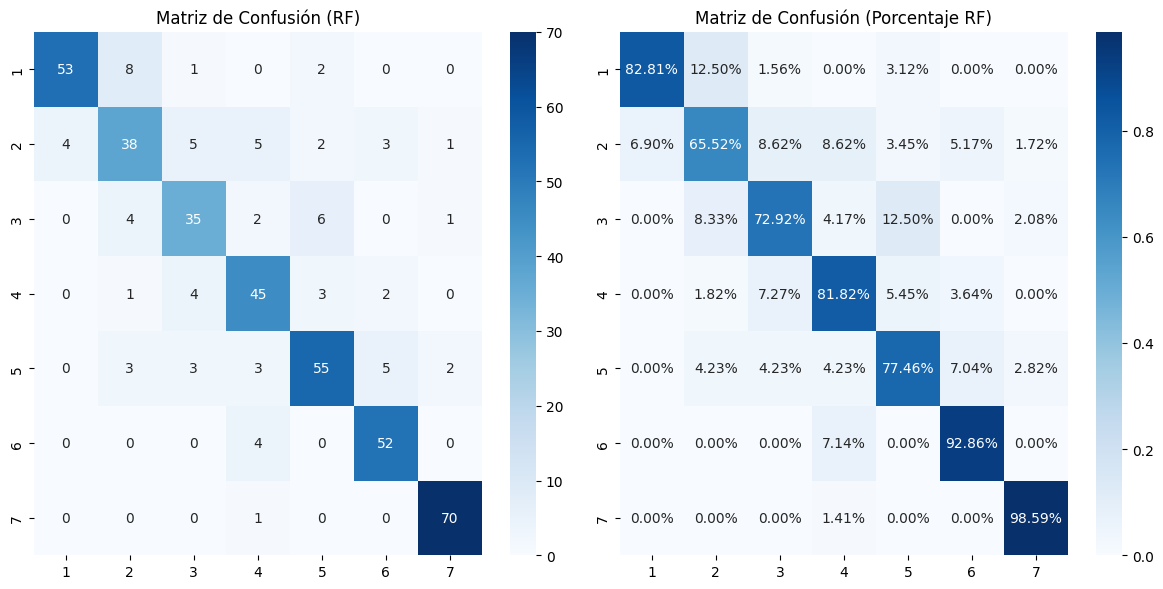

In [12]:
# Establecer la semilla para reproducibilidad
np.random.seed(123)

# Definir las columnas numéricas
columnas_numericas = X_train.select_dtypes(include=['float64', 'int64']).columns

# Construir el pipeline para las características numéricas
pipeline_numerico = Pipeline([
    ('scaler', StandardScaler())
])

# Crear el transformador de columnas
transformador_columnas = ColumnTransformer([
    ('numeric', pipeline_numerico, columnas_numericas)
])

# Aplicar el transformador a X_train y X_test
X_train_procesado = transformador_columnas.fit_transform(X_train)
X_test_procesado = transformador_columnas.transform(X_test)

# Inicializar el modelo de Random Forest
random_forest = RandomForestClassifier(random_state=123)

# Entrenar el modelo
random_forest.fit(X_train_procesado, y_train)

# Predecir en el conjunto de prueba
y_pred = random_forest.predict(X_test_procesado)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Random Forest:", accuracy)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el total de predicciones por clase
total_por_clase_rf = conf_matrix.sum(axis=1)

# Calcular la matriz de confusión como porcentaje
conf_matrix_porcentaje_rf = conf_matrix / total_por_clase_rf[:, np.newaxis]

# Crear una figura y ejes para la grilla
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Matriz de confusión sin normalizar
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=etiquetas_unicas, yticklabels=etiquetas_unicas, ax=axs[0])
axs[0].set_title('Matriz de Confusión (RF)')

# Matriz de confusión en porcentajes
sns.heatmap(conf_matrix_porcentaje_rf, annot=True, cmap='Blues', fmt='.2%', xticklabels=etiquetas_unicas, yticklabels=etiquetas_unicas, ax=axs[1])
axs[1].set_title('Matriz de Confusión (Porcentaje RF)')

# Ajustar el diseño de la grilla
plt.tight_layout()

# Mostrar la grilla
plt.show()

In [13]:
# Obtener la importancia de las variables
importancias_variables = random_forest.feature_importances_

# Crear un DataFrame para mostrar las importancias de las variables
df_importancias = pd.DataFrame({'Variable': X_train.columns, 'Importancia': importancias_variables})

# Ordenar el DataFrame por importancia de las variables
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# Imprimir las importancias de las variables
print(df_importancias)

                                      Variable  Importancia
18                                         Age     0.236336
20                                         NCP     0.072462
22                                         FAF     0.070379
19                                        FCVC     0.069985
23                                         TUE     0.056155
21                                        CH2O     0.054821
0                        onehot__Gender_Female     0.046113
16                      onehot__CALC_Sometimes     0.040253
1                          onehot__Gender_Male     0.036387
17                             onehot__CALC_no     0.033575
27                MTRANS_Public_Transportation     0.032292
3   onehot__family_history_with_overweight_yes     0.032050
2    onehot__family_history_with_overweight_no     0.031940
8                       onehot__CAEC_Sometimes     0.030790
7                      onehot__CAEC_Frequently     0.025419
24                           MTRANS_Auto

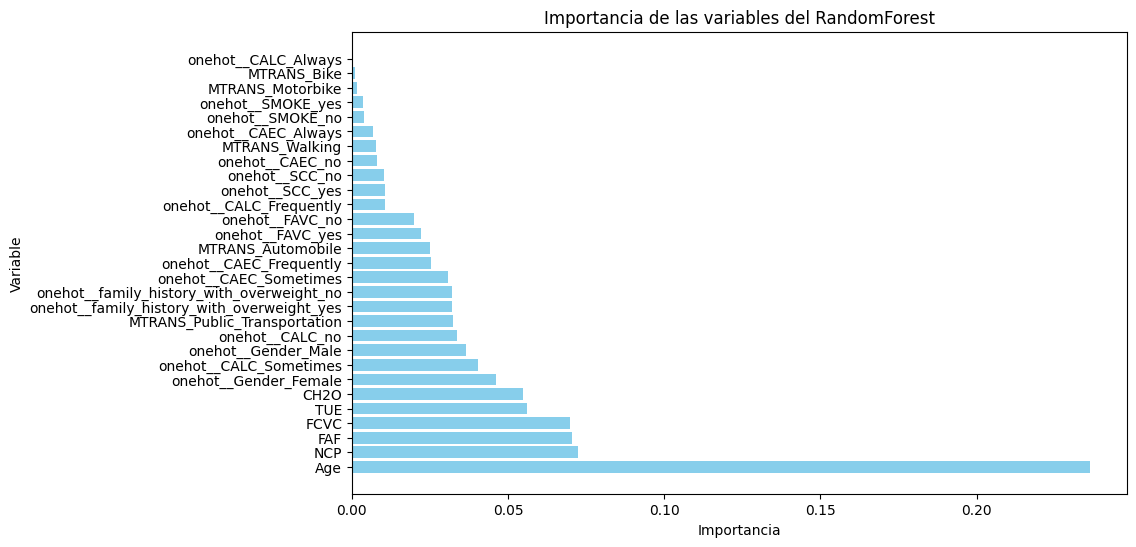

In [14]:
# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar las importancias de las variables
plt.barh(df_importancias['Variable'], df_importancias['Importancia'], color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las variables del RandomForest')

# Mostrar la gráfica
plt.show()

El siguiente bloque de código se centra en la creación, entrenamiento y evaluación de un modelo de red neuronal utilizando la biblioteca TensorFlow. 

Inicialmente, se establecen las semillas para NumPy y TensorFlow para garantizar la reproducibilidad de los resultados. Luego, se carga el conjunto de datos desde un archivo CSV y se realiza la codificación de las variables categóricas utilizando `LabelEncoder`.

Posteriormente, se dividen los datos en conjuntos de entrenamiento y prueba, con un 80% de los datos destinados al entrenamiento y el restante 20% para la evaluación del modelo.

Se define la arquitectura del modelo de red neuronal utilizando la clase `Sequential` de Keras, que consta de múltiples capas densas. El modelo se compila con el optimizador 'adam' y la función de pérdida 'sparse_categorical_crossentropy'.

A continuación, se entrena el modelo utilizando los datos de entrenamiento. Durante el entrenamiento, se utiliza una técnica de regularización llamada 'Dropout' para evitar el sobreajuste del modelo.

Una vez entrenado el modelo, se realizan predicciones sobre el conjunto de prueba y se evalúa el rendimiento del modelo utilizando métricas como la precisión y la matriz de confusión. La matriz de confusión se muestra tanto en su forma absoluta como normalizada en porcentaje para una mejor comprensión de las predicciones del modelo.

Finalmente, se grafican las curvas de pérdida y precisión a lo largo de las épocas para visualizar el desempeño del modelo durante el entrenamiento.



Epoch 1/1000


53/53 [==============================] - 2s 11ms/step - loss: 2.4718 - accuracy: 0.1588 - val_loss: 1.8970 - val_accuracy: 0.2624
Epoch 2/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.9627 - accuracy: 0.1724 - val_loss: 1.8774 - val_accuracy: 0.2293
Epoch 3/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.9104 - accuracy: 0.2186 - val_loss: 1.8126 - val_accuracy: 0.3357
Epoch 4/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.8321 - accuracy: 0.2577 - val_loss: 1.7344 - val_accuracy: 0.3475
Epoch 5/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.7644 - accuracy: 0.2826 - val_loss: 1.6087 - val_accuracy: 0.4374
Epoch 6/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.7173 - accuracy: 0.3057 - val_loss: 1.5410 - val_accuracy: 0.4043
Epoch 7/1000
53/53 [==============================] - 0s 4ms/step - loss: 1.6198 - accuracy: 0.3495 - val_loss: 1.4357 - val_accuracy: 0.4846
E

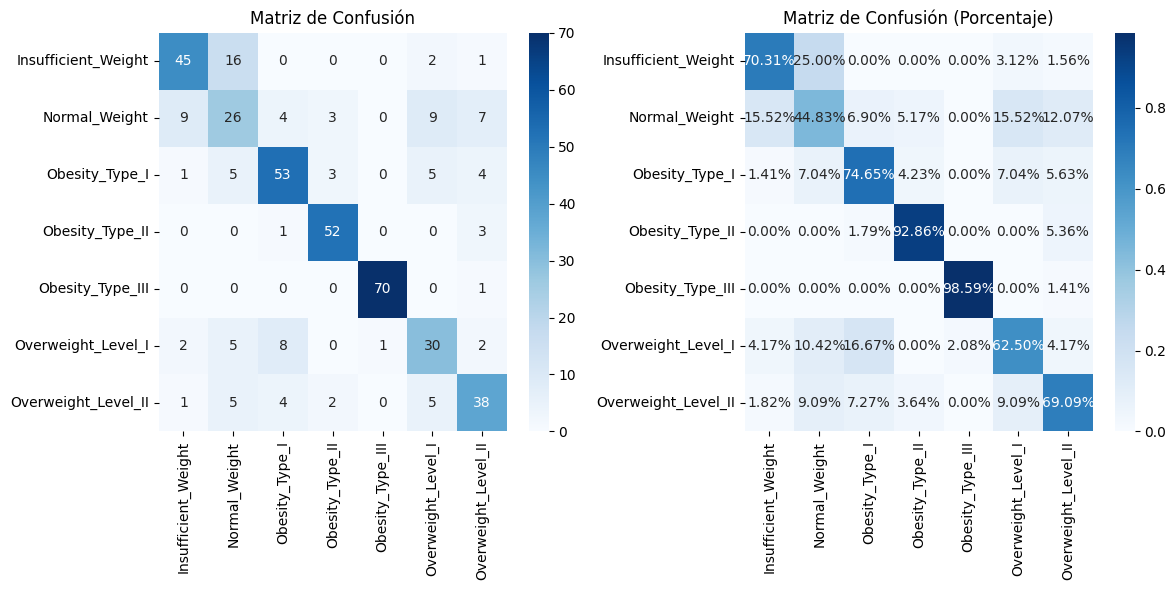

Epoch 1/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.5528 - accuracy: 0.8432
Epoch 2/1000
66/66 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.8527
Epoch 3/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.8399
Epoch 4/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.8375
Epoch 5/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.8347
Epoch 6/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.8446
Epoch 7/1000
66/66 [==============================] - 0s 3ms/step - loss: 0.4501 - accuracy: 0.8513
Epoch 8/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.8498
Epoch 9/1000
66/66 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.8475
Epoch 10/1000
66/66 [==============================] - 0s 3ms/step - loss: 0.4639 - accuracy: 0.8513

<Figure size 800x600 with 0 Axes>

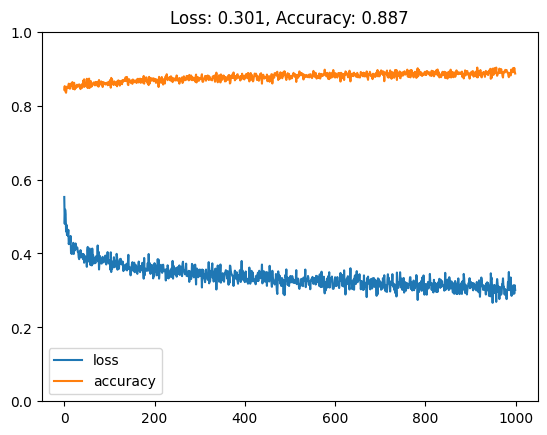

In [15]:
# Establecer la semilla para NumPy
np.random.seed(123)

# Establecer la semilla para TensorFlow
tf.random.set_seed(123)

ruta_archivo = "../Datos/ObesityDataSet_raw_and_data_sinthetic.csv"

datos = pd.read_csv(ruta_archivo)

encoder = LabelEncoder()
datos['Gender2'] = encoder.fit_transform(datos['Gender'])
datos['family_history_with_overweight2'] = encoder.fit_transform(datos['family_history_with_overweight'])
datos['FAVC2'] = encoder.fit_transform(datos['FAVC'])
datos['CAEC2'] = encoder.fit_transform(datos['CAEC'])
datos['SMOKE2'] = encoder.fit_transform(datos['SMOKE'])
datos['SCC2'] = encoder.fit_transform(datos['SCC'])
datos['CALC2'] = encoder.fit_transform(datos['CALC'])
datos['MTRANS2'] = encoder.fit_transform(datos['MTRANS'])
datos['FCVC2'] = round(datos['FCVC'], 0)
datos['TUE2'] = round(datos['TUE'], 0)
datos['NCP2'] = round(datos['NCP'], 0)
datos['CH2O2'] = round(datos['CH2O'], 0)
datos['FAF2'] = round(datos['FAF'], 0)

# Seleccionar las variables de interés
variables_entrada = ['Age', 'FCVC2', 'NCP2', 'CH2O2', 'FAF2', 'TUE2','Gender2','family_history_with_overweight2','FAVC2','CAEC2','SMOKE2','SCC2','CALC2','MTRANS2']
variable_objetivo = 'NObeyesdad'
X = datos[variables_entrada]
y = datos[variable_objetivo]

# Codificar la variable objetivo
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Construir el modelo
modelo = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(variables_entrada)], kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    layers.Dropout(0.2),  # Agregar capa de dropout para regularización
    layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    layers.Dropout(0.2),  # Agregar otra capa de dropout
    layers.Dense(len(encoder.classes_), activation='softmax', kernel_initializer='glorot_uniform', bias_initializer='zeros')
])

# Compilar el modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con la semilla de TensorFlow establecida
tf.random.set_seed(123)
history = modelo.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), verbose=1)

modelo.summary()

# Predecir en el conjunto de prueba
y_pred = modelo.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)  # Convert predictions to integers

# Calcular la matriz de confusión normalizada por filas
conf_matrix = confusion_matrix(y_test, y_pred_int)
conf_matrix_porcentaje = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]  # Convertir a porcentajes

# Etiquetas únicas de las clases
etiquetas_clases = encoder.classes_

# Crear una figura y ejes para la grilla
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Mapa de calor de la matriz de confusión sin normalizar
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=etiquetas_clases, yticklabels=etiquetas_clases, ax=axs[0])
axs[0].set_title('Matriz de Confusión')

# Mapa de calor de la matriz de confusión normalizada por porcentajes
sns.heatmap(conf_matrix_porcentaje, annot=True, cmap='Blues', fmt='.2%', xticklabels=etiquetas_clases, yticklabels=etiquetas_clases, ax=axs[1])
axs[1].set_title('Matriz de Confusión (Porcentaje)')

# Ajustar el diseño de la grilla
plt.tight_layout()

# Mostrar la grilla
plt.show()

tf.random.set_seed(123)
history = modelo.fit(x=X, y=y, verbose=1, epochs=1000)

def plot_loss_accuracy(history):
    np.random.seed(123)  # Establecer la semilla para NumPy
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))
    
plot_loss_accuracy(history)


                           Variable  Importancia
10                           SMOKE2     0.632792
11                             SCC2     0.585428
6                           Gender2     0.471289
7   family_history_with_overweight2     0.439894
8                             FAVC2     0.420095
12                            CALC2     0.347829
9                             CAEC2     0.337063
5                              TUE2     0.290368
2                              NCP2     0.277589
1                             FCVC2     0.267078
3                             CH2O2     0.264857
4                              FAF2     0.243631
13                          MTRANS2     0.236919
0                               Age     0.099198


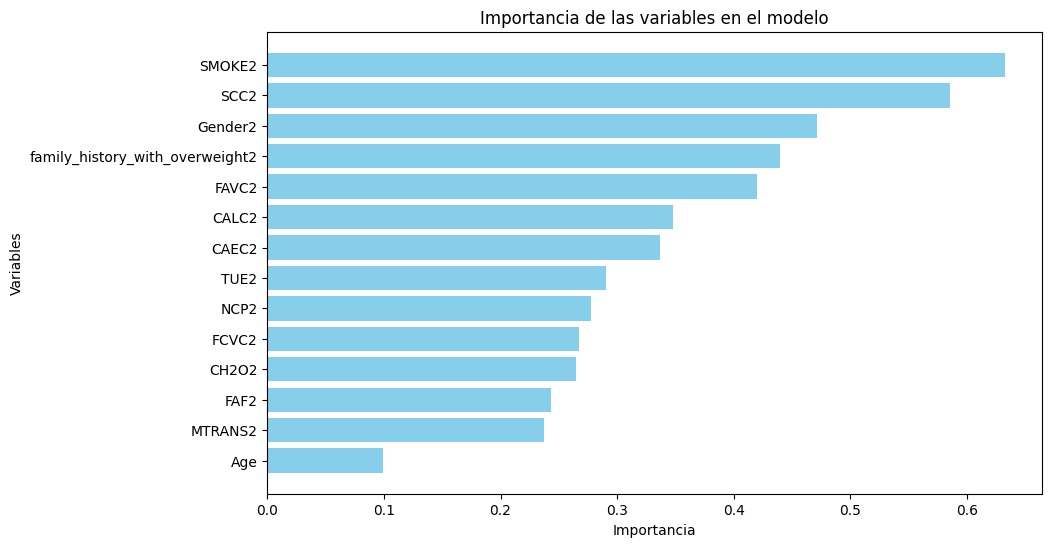

In [17]:
# Obtener los pesos de la primera capa densa
pesos_primera_capa = modelo.layers[0].get_weights()[0]

# Calcular la importancia relativa de las variables multiplicando los pesos por su valor
importancia_variables = np.mean(np.abs(pesos_primera_capa), axis=1)

# Crear un DataFrame para mostrar la importancia de las variables
df_importancia_variables = pd.DataFrame({'Variable': variables_entrada, 'Importancia': importancia_variables})

# Ordenar el DataFrame por importancia de las variables
df_importancia_variables = df_importancia_variables.sort_values(by='Importancia', ascending=False)

# Imprimir las importancias de las variables
print(df_importancia_variables)

# Graficar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(df_importancia_variables['Variable'], df_importancia_variables['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables en el modelo')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la variable más importante arriba
plt.show()
